In [81]:
import json
import pandas as pd
import numpy as np

In [82]:
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

In [151]:
url = 'http://api.bitcoincharts.com/v1/markets.json'
response = urlopen(url)
data = json.loads(response.read())
df = pd.DataFrame(data)
# delete rows where volume == 0.
df = df[df.volume != 0]
df.head()

,ask,avg,bid,close,currency,currency_volume,high,latest_trade,low,symbol,volume
0,6280100.00,6259159.035425,6.280000e+06,6280100.00,IDR,6.429376e+09,6338900.00,1450972047,6175000.00,btcoidIDR,1027.194925
1,226.57,490.174481,4.530453e+10,496.02,USD,8.444803e+05,3083.70,1450971872,338.98,localbtcUSD,1722.815800
6,455.62,450.393124,4.551100e+02,454.71,USD,1.242560e+06,459.00,1450971338,438.05,itbitUSD,2758.834000
7,643.01,636.314094,6.421100e+02,642.00,SGD,8.581675e+04,647.03,1450971923,619.20,itbitSGD,134.865400
8,414.88,406.049215,4.141700e+02,413.47,EUR,1.002146e+05,416.18,1450971376,401.18,itbitEUR,246.804100


## Currency

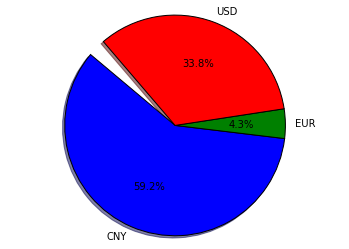

In [150]:
grouped = df.groupby('currency')
curr_vol = grouped.sum()['volume']
labels = curr_vol.index.values
sizes = curr_vol.values / sum(curr_vol.values) 
labels = labels[sizes > 0.01]
sizes = sizes[sizes > 0.01]
import matplotlib.pyplot as plt
%matplotlib inline
# Plot
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Volume

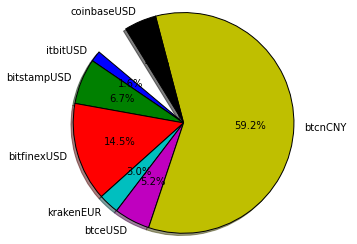

In [86]:
labels = df['symbol']
sizes = df['volume'] / sum(df['volume'])
labels = labels[sizes > 0.01]
sizes = sizes[sizes > 0.01]
import matplotlib.pyplot as plt
%matplotlib inline
# Plot
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()